In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd gdrive/MyDrive/DISSERTATION/MultipleCurves/

/content/gdrive/MyDrive/DISSERTATION/MultipleCurves


In [3]:
#!git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

In [4]:
%cd SFC-CAE-Ready-to-use

/content/gdrive/MyDrive/DISSERTATION/MultipleCurves/SFC-CAE-Ready-to-use


### Install dependencies

In [5]:
#!pip install -e .

### Import useful functions inside this repo, very important, don't forget!!!

In [6]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
from structured import *
from training import *
from util import *
from sfc_cae import *

Unzip advection_block data, taking 3 miniutes:

### Load tensors

In [7]:
os.chdir("..")

In [8]:
DATADIR = 'advection_gaussian_128/output/simulation'
simulaion_steps = 40
total_num = 500

In [9]:
# simulaion_steps = 40
# full_tensor = load_tensor(DATADIR, np.arange(total_num), simulaion_steps)

In [10]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = total_num)

In [11]:
# train_set = full_tensor[train_index - 1]
# valid_set = full_tensor[valid_index - 1]
# test_set = full_tensor[test_index - 1]

### Save tensor if you want to reuse:

In [12]:
# torch.save(train_set, '/content/gdrive/MyDrive/advection_block/train_tensor_gaussian.pt')
# torch.save(valid_set, '/content/gdrive/MyDrive/advection_block/valid_tensor_gaussian.pt')
# torch.save(test_set, '/content/gdrive/MyDrive/advection_block/test_tensor_gaussian.pt')

Load tensor

In [13]:
train_set = torch.load('/content/gdrive/MyDrive/DISSERTATION/MultipleCurves/train_tensor.pt', map_location=torch.device('cpu')).float()
valid_set = torch.load('/content/gdrive/MyDrive/DISSERTATION/MultipleCurves/valid_tensor.pt', map_location=torch.device('cpu')).float()
test_set = torch.load('/content/gdrive/MyDrive/DISSERTATION/MultipleCurves/test_tensor.pt', map_location=torch.device('cpu')).float()

# Structured mesh

In [14]:
simulation = run_simulation_advection()
def get_simulation_index(num, simulation):
    return np.arange(num * (simulation.steps + 1), (num + 1) * (simulation.steps + 1))

In [15]:
simulation.full_stage = np.array(test_set[get_simulation_index(17, simulation), :])

In [16]:
size = 128
batch_size = 64
seed = 17
valid_batch_size = 1000
test_batch_size = 1000

In [17]:
# space_filling_orderings, invert_space_filling_orderings = get_MFT_RNN_curves_structured(size, 50)

In [18]:
# import pickle

# pickle_out = open("sfcz.pickle","wb")
# pickle.dump(space_filling_orderings, pickle_out)
# pickle_out.close()

# pickle_out = open("isfcz.pickle","wb")
# pickle.dump(invert_space_filling_orderings, pickle_out)
# pickle_out.close()

In [19]:
import pickle
pickle_in = open("sfcz.pickle","rb")
space_filling_orderings = pickle.load(pickle_in)

pickle_in = open("isfcz.pickle","rb")
invert_space_filling_orderings = pickle.load(pickle_in)

In [20]:
nx, ny = (128, 128)
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xv, yv= np.meshgrid(x, y)
coords = np.zeros((128*128,3))
coords[:,0] = xv.flatten()
coords[:,1] = yv.flatten()
coords = torch.Tensor(coords)

In [21]:
# coords

In [22]:
# plot_trace_vtu_2D(coords[space_filling_orderings[0]], 20)

In [23]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=valid_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=test_batch_size, shuffle=True)

In [24]:
input_size = size ** 2
dimension = 2
components = 1
structured = True
self_concat = 1
nearest_neighbouring = False
fully_connected = False
dims_latent = 200
coordsoption = False

In [25]:
# space_filling_orderings, invert_space_filling_orderings = get_hilbert_curves(128, 1)

In [26]:
#custom_structure = [[16384, 16384, 4097, 1025, 257, 68], [1, 12, 4, 4, 8, 16], []]

In [27]:
autoencoder = SFC_CAE(input_size,
                                  dimension,
                                  components,
                                  structured,
                                  self_concat,
                                  nearest_neighbouring,
                                  fully_connected,
                                  dims_latent,
                                  [space_filling_orderings[0]], 
                                  [invert_space_filling_orderings[0]],
                                  coordsoption = coordsoption,
                                  coords = coords,
                                  smoothinglayer = False)

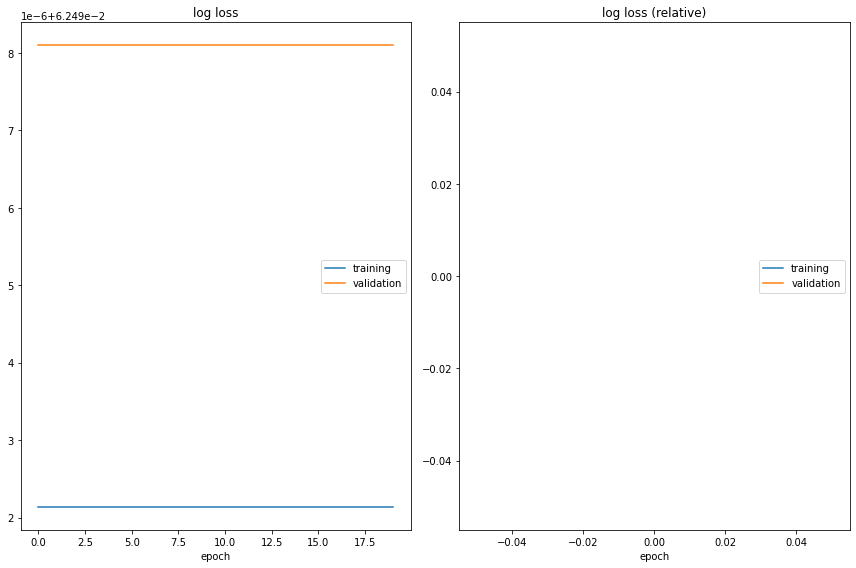

log loss
	training         	 (min:    0.062, max:    0.062, cur:    0.062)
	validation       	 (min:    0.062, max:    0.062, cur:    0.062)
log loss (relative)
	training         	 (min:      inf, max:      inf, cur:      inf)
	validation       	 (min:      inf, max:      inf, cur:      inf)
Epoch:  19 | train loss: 6.249214e-02 | valid loss: 6.249810e-02 
      	| train loss (relative): inf | valid loss (relative): inf 
Epoch 19 use: 3.26 second.

epoch 20 starting......


In [ ]:
autoencoder = train_model(autoencoder, 
                            train_loader = train_loader,
                            valid_loader = valid_loader,
                            test_loader = test_loader,
                            shufflebatches = True,
                            sfcstoshuffle = space_filling_orderings[:40],
                            isfcstoshuffle = invert_space_filling_orderings[:40],
                            n_epochs = 50, 
                            lr = 2e-5, 
                            seed = seed,
                            visualize = True
                            )

In [ ]:
autoencoder = train_model(autoencoder, 
                            train_loader = train_loader,
                            valid_loader = valid_loader,
                            test_loader = test_loader,
                            shufflebatches = True,
                            sfcstoshuffle = space_filling_orderings[:40],
                            isfcstoshuffle = invert_space_filling_orderings[:40],
                            n_epochs = 50, 
                            lr = 1e-5, 
                            seed = seed,
                            visualize = True
                            )

In [ ]:
autoencoder.changesfcs([space_filling_orderings[40]],[invert_space_filling_orderings[40]])
test_out = autoencoder.to('cuda')(test_set.to("cuda"))

In [ ]:
torch.save(autoencoder.state_dict(), "Autoencoder-"+ str(autoencoder.encoder.conv_size[-1]*autoencoder.encoder.channels[-1]) + "-error7-03-shuffled.w")

In [ ]:
# simulation.full_stage = np.array(test_set[get_simulation_index(20, simulation), :])
# anim = simulation.generate_anime()
# anim.save('OG20.mp4')

In [ ]:
for j in (20,30):
  for i in range(40, 45):
    autoencoder.changesfcs([space_filling_orderings[i]],[invert_space_filling_orderings[i]])
    simulation.full_stage = test_out[get_simulation_index(j, simulation), :].cpu().detach().numpy()
    anim = simulation.generate_anime()
    stringy = '%s' % float('%.2g' % nn.MSELoss()(test_set, test_out.cpu()).item())
    anim.save("reconstructed_batchshuffle_ldims"+ str(autoencoder.encoder.conv_size[-1]*autoencoder.encoder.channels[-1]) +"_curven_"+ str(i) +"error_"+ stringy + "_sim"+str(j)+".mp4")

In [ ]:
import time
time.sleep(50000)

## Get the Flow Past Cylinder data (three pieces)
1. DG_Mesh_old (1000 snapshots)
2. DG_Mesh_new (2000 snapshots)
3. CG_Mesh_new (2000 snapshots)

In [ ]:
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

In [ ]:
!bash ./get_FPC_data.sh

### specify your own {DATA_DIR} of vtu files here.

In [ ]:
# data_path = 'FPC_Re3900_DG_old/'
data_path = 'FPC_Re3900_DG_new/'
# data_path = 'FPC_Re3900_CG_new/'

In [ ]:
!cd {data_path} && ls -l |grep "^-"|wc -l

In [ ]:
full_tensor, coords = read_in_files(data_path, vtu_field='Velocity')

### Save the full tensor in your `google_drive` for further use.

In [ ]:
# full_tensor = torch.from_numpy(full_tensor).float()
# torch.save(full_tensor, '/content/gdrive/MyDrive/FPC_new_velocity.pt')
# torch.save(coords, '/content/gdrive/MyDrive/FPC_new_mesh.pt')

In [ ]:
# full_tensor = torch.load('/content/gdrive/MyDrive/FPC_old_velocity.pt').float()
# old_coords = torch.load('/content/gdrive/MyDrive/FPC_old_mesh.pt')

In [ ]:
full_tensor = torch.load('/content/gdrive/MyDrive/FPC_new_velocity.pt')
coords = torch.load('/content/gdrive/MyDrive/FPC_new_mesh.pt')

### Generate space-filling-curves from `vtu` files

In [ ]:
# specify space-filling curve numbers
ncurves = 2
space_filling_orderings, invert_space_filling_orderings = get_sfc_curves_from_coords(coords, ncurves)

In [ ]:
#visualize the space-filling curve
plot_trace_vtu_2D(coords[space_filling_orderings[0]], 15)

In [ ]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = full_tensor.shape[0])

In [ ]:
# full_tensor_nor, tk, tb = normalize_tensor(full_tensor)

In [ ]:
train_set = full_tensor[train_index - 1]
valid_set = full_tensor[valid_index - 1]
test_set = full_tensor[test_index - 1]

In [ ]:
#normalization
train_set, train_mean, train_std = normalize_tensor(train_set, lower = 0, upper = 1)
valid_set, valid_mean, valid_std = normalize_tensor(valid_set, lower = 0, upper = 1)
test_set, test_mean, test_std = normalize_tensor(test_set, lower = 0, upper = 1)

In [ ]:
train_set.shape

In [ ]:
# # random indexing test
# rng = np.random.default_rng()
# space_filling_orderings = [rng.permutation(np.arange(full_tensor.shape[1])), rng.permutation(np.arange(full_tensor.shape[1]))]
# invert_space_filling_orderings = [rng.permutation(np.arange(full_tensor.shape[1])), rng.permutation(np.arange(full_tensor.shape[1]))]

In [ ]:
autoencoder = SFC_CAE(input_size,
                      dimension,
                      components,
                      structured,
                      self_concat,
                      nearest_neighbouring,
                      dims_latent,
                      space_filling_orderings, 
                      invert_space_filling_orderings)

In [ ]:
batch_size = 64
seed = 32
valid_batch_size = 1000

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=valid_batch_size, shuffle=True)

In [ ]:
input_size = full_tensor.shape[1]
dimension = 2
if full_tensor.ndim > 2: components = full_tensor.shape[-1]
else: components = 1
structured = True
self_concat = 1
nearest_neighbouring = True
dims_latent = 1

In [ ]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          n_epochs =1000, 
                          lr = 1e-4,
                          criterion_type = 'MSE',
                          seed = seed)

## Get the Slugflow data (16 snapshots)

In [ ]:
!bash get_data_slugflow.sh

In [ ]:
data_path = 'slugflow_sixteen/'

In [ ]:
files = glob.glob(data_path + '*')
vtu_fields = ['Component1::ComponentMassFractionPhase1','phase1::Velocity']

In [ ]:
# vtu_file = meshio.read('./slugflow_sixteen/slug_255_exp_projected_compressed_10.vtu')
data = []
for i, file in enumerate(files):
    vtu_file = meshio.read(file)
    print('loaded ' + file)
    for j in range(len(vtu_fields)):
        vtu_field = vtu_fields[j]
        field = vtu_file.point_data[vtu_field]
        if field.ndim == 1: field = field.reshape(field.shape[0], 1)
        if j==0: data.append(field)
        else: data[i] = np.hstack((data[i], field))
tensor = torch.from_numpy(np.array(data)).float()

In [ ]:
# torch.save(tensor, '/content/gdrive/MyDrive/slugflow_16.pt')
full_tensor = torch.load('/content/gdrive/MyDrive/slugflow_16.pt')

In [ ]:
train_set = full_tensor
valid_set = full_tensor

In [ ]:
#normalization
train_set, train_mean, train_std = normalize_tensor(train_set, lower = 0, upper = 1)
valid_set, valid_mean, valid_std = normalize_tensor(valid_set, lower = 0, upper = 1)

In [ ]:
train_set.shape

In [ ]:
input_size = full_tensor.shape[1]
dimension = 3
components = full_tensor.shape[-1]
structured = False
self_concat = 1
nearest_neighbouring = True
dims_latent = 32

In [ ]:
# random indexing test
ncurve = 1
space_filling_orderings = []
invert_space_filling_orderings = []
rng = np.random.default_rng()
for i in range(ncurve):
    space_filling_orderings.append(rng.permutation(np.arange(full_tensor.shape[1])))
    invert_space_filling_orderings.append(rng.permutation(np.arange(full_tensor.shape[1])))

In [ ]:
autoencoder = SFC_CAE(input_size,
                      dimension,
                      components,
                      structured,
                      self_concat,
                      nearest_neighbouring,
                      dims_latent,
                      space_filling_orderings, 
                      invert_space_filling_orderings)

In [ ]:
batch_size = 8
seed = 31
valid_batch_size = valid_set.shape[0]

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=valid_batch_size, shuffle=True)

In [ ]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          n_epochs =200, 
                          lr = 1e-4,
                          criterion_type = 'MSE',
                          seed = seed)

In [ ]:
torch.cuda.empty_cache()